# Import packages and Inspect Dataset

In [28]:
import numpy as np
import pandas as pd

In [29]:
df = pd.read_csv('../data/founder_V0.3_founder.csv')
print(df.head(5))
print(df.tail(5))


         Full Name                       Primary Job Title  \
0        Elon Musk       Chairman, Product Architect & CEO   
1      JB Straubel                      Co-Founder and CTO   
2  Mark Zuckerberg                           Founder & CEO   
3       Ross Mason      Founder and VP of Product Strategy   
4     Rahul Gandhi  Co-Founder & SVP of Finance Operations   

                                                 Bio  Gender  \
0  Elon co-founded Tesla and continues to oversee...       1   
1  The story of JB Straubel's career started at a...       1   
2  Mark Zuckerberg is the founder and CEO of Face...       1   
3  Created the Mule Project, Founded MuleSoft, go...       1   
4  Rahul is a Co-founder & Senior Vice President ...       1   

   Number of News Articles  Number of Founded Organizations  \
0                    14445                                7   
1                      100                                2   
2                    19678                           

In [30]:
print(df.shape)

(18361, 21)


In [31]:
print(df.describe)

<bound method NDFrame.describe of              Full Name                       Primary Job Title  \
0            Elon Musk       Chairman, Product Architect & CEO   
1          JB Straubel                      Co-Founder and CTO   
2      Mark Zuckerberg                           Founder & CEO   
3           Ross Mason      Founder and VP of Product Strategy   
4         Rahul Gandhi  Co-Founder & SVP of Finance Operations   
...                ...                                     ...   
18356    Glenn Shimkus                        Co-founder & CEO   
18357  Douglas Keszler                              Co-Founder   
18358  Clark Johannson   Co-Founder & Chief Technology Officer   
18359  Stefano Colonna                                 Founder   
18360  Daniel Hoepfner                                 Founder   

                                                     Bio  Gender  \
0      Elon co-founded Tesla and continues to oversee...       1   
1      The story of JB Straubel's car

In [32]:
print(df.info)

<bound method DataFrame.info of              Full Name                       Primary Job Title  \
0            Elon Musk       Chairman, Product Architect & CEO   
1          JB Straubel                      Co-Founder and CTO   
2      Mark Zuckerberg                           Founder & CEO   
3           Ross Mason      Founder and VP of Product Strategy   
4         Rahul Gandhi  Co-Founder & SVP of Finance Operations   
...                ...                                     ...   
18356    Glenn Shimkus                        Co-founder & CEO   
18357  Douglas Keszler                              Co-Founder   
18358  Clark Johannson   Co-Founder & Chief Technology Officer   
18359  Stefano Colonna                                 Founder   
18360  Daniel Hoepfner                                 Founder   

                                                     Bio  Gender  \
0      Elon co-founded Tesla and continues to oversee...       1   
1      The story of JB Straubel's caree

In [33]:
# inspect each column more closely
for col in df.iteritems():
    print(df[str(col[0])].head(5))

0          Elon Musk
1        JB Straubel
2    Mark Zuckerberg
3         Ross Mason
4       Rahul Gandhi
Name: Full Name, dtype: object
0         Chairman, Product Architect & CEO
1                        Co-Founder and CTO
2                             Founder & CEO
3        Founder and VP of Product Strategy
4    Co-Founder & SVP of Finance Operations
Name: Primary Job Title, dtype: object
0    Elon co-founded Tesla and continues to oversee...
1    The story of JB Straubel's career started at a...
2    Mark Zuckerberg is the founder and CEO of Face...
3    Created the Mule Project, Founded MuleSoft, go...
4    Rahul is a Co-founder & Senior Vice President ...
Name: Bio, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64
0    14445
1      100
2    19678
3      128
4      861
Name: Number of News Articles, dtype: int64
0     7
1     2
2    10
3     1
4     1
Name: Number of Founded Organizations, dtype: int64
0    11
1     1
2     6
3     6
4     0
Name: Number

In [34]:
def checkColNames(data):
    cols_names = []
    for col in data.iteritems():
        cols_names.append(col[0])
    return cols_names
checkColNames(df)

['Full Name',
 'Primary Job Title',
 'Bio',
 'Gender',
 'Number of News Articles',
 'Number of Founded Organizations',
 'Number of Portfolio Companies',
 'Number of Investments_x',
 'Number of Partner Investments',
 'Number of Lead Investments_x',
 'Number of Exits_x',
 'Number of Events_x',
 'Categories',
 'Headquarters Location ',
 'Operating Status',
 'Founded Date',
 'Closed Date',
 'Company Type',
 'Number of Founders',
 'Success',
 'Founder']

In [35]:
def countGenders(col):
    male_count = 0
    female_count = 0
    not_identified_count = 0
    for g in df[col]:
        if g == 1:
            male_count += 1
        if g == 0:
            female_count += 1
        else:
            not_identified_count += 1
    print(male_count)
    print(female_count)
    print(not_identified_count)
countGenders('Gender')
female_percent = np.divide(1709, (16521+1709))
print("The percent of female founders in this dataset is " + 
      str(np.round(female_percent*100, decimals=2))+".")

16521
1709
16652
The percent of female founders in this dataset is 9.37.


In [36]:
df['Success'].value_counts()

0    11185
1     7176
Name: Success, dtype: int64

In [37]:
cat_df = df['Categories']
cat_df = pd.Series(cat_df)
cat_df = cat_df.str.split(',', expand=True)
df2 = pd.DataFrame(cat_df)
df2 = pd.concat([cat_df[0], cat_df[1], cat_df[2]], axis=1)
new_df2 = df2.rename(columns = {0:'Category1', 1:'Category2', 2:'Category3'})
temp_df = pd.concat([df, new_df2], axis = 1)
temp_df = temp_df.drop(['Category1', 'Category2', 'Category3'], axis=1)


In [38]:
final_df = pd.DataFrame(temp_df)
dummy_country_df = pd.get_dummies(final_df['Headquarters Location '])

In [39]:
final_df = final_df.drop(['Headquarters Location ', 'Full Name', 'Primary Job Title', 'Bio', 'Operating Status', 'Closed Date', 'Founder', 'Company Type'], axis=1)
final_df = pd.concat([final_df, dummy_country_df], axis = 1)
print(final_df.columns)

Index(['Gender', 'Number of News Articles', 'Number of Founded Organizations',
       'Number of Portfolio Companies', 'Number of Investments_x',
       'Number of Partner Investments', 'Number of Lead Investments_x',
       'Number of Exits_x', 'Number of Events_x', 'Categories',
       ...
       ' Utah', ' Venezuela', ' Vermont', ' Vietnam', ' Virginia',
       ' Washington', ' Wisconsin', ' Zambia', '0', 'United Kingdom'],
      dtype='object', length=155)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import random as r
from sklearn.model_selection import train_test_split

In [44]:
final_df = final_df.drop('Categories', axis=1)
y = final_df['Success'].values
X = final_df.drop('Success', axis=1)
X = pd.DataFrame(X)
print("Shape of y: " + str(y.shape))
print("Shape of X: " + str(X.shape))
print(X.columns)

Shape of y: (18361,)
Shape of X: (18361, 153)
Index(['Gender', 'Number of News Articles', 'Number of Founded Organizations',
       'Number of Portfolio Companies', 'Number of Investments_x',
       'Number of Partner Investments', 'Number of Lead Investments_x',
       'Number of Exits_x', 'Number of Events_x', 'Founded Date',
       ...
       ' Utah', ' Venezuela', ' Vermont', ' Vietnam', ' Virginia',
       ' Washington', ' Wisconsin', ' Zambia', '0', 'United Kingdom'],
      dtype='object', length=153)


In [45]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size = .2, random_state = 42)

# Random Forest 

In [46]:
random_forest = RandomForestClassifier(n_estimators= 1000)
random_forest.fit(x_train, y_train)
y_pred_forest = random_forest.predict(x_test)

train_score = round(random_forest.score(x_train, y_train)*100, 2)
test_score = round(random_forest.score(x_test, y_test)*100, 2)

print("Training Score: " + str(train_score))
print("Testing Score: "+ str(test_score))

Training Score: 93.1
Testing Score: 77.38


In [47]:
from sklearn.metrics import average_precision_score
# precision score : correct predicted positive observations/ total predicted positive observations
avg_precision_FOREST = average_precision_score(y_test, y_pred_forest)
print("The Average Precision Score, which is the number of correctly predicted positive observations divided by the total predicted positive observations, is: " + str(round(avg_precision_FOREST, 5)))


The Average Precision Score, which is the number of correctly predicted positive observations divided by the total predicted positive observations, is: 0.62188


Text(0.5, 1.0, 'Precision-Recall Curve')

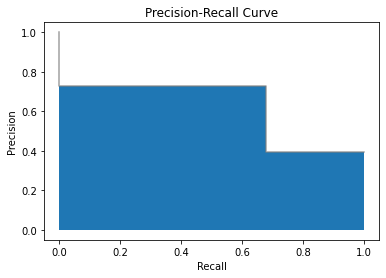

In [48]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, _ = precision_recall_curve(y_test, y_pred_forest)
plt.step(recall, precision, color='gray', alpha = .75, where='post')
plt.fill_between(recall, precision, step='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

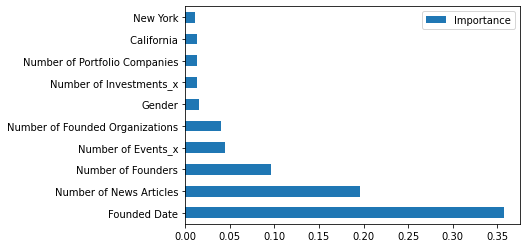

In [49]:
def plot_feature_importance(model, x, y):
    importance = pd.DataFrame(
    model.feature_importances_,
    columns = ['Importance'],
    index = x.columns
    )
    importance = importance.sort_values(['Importance'], ascending = False)
    importance[:10].plot(kind = 'barh')
    
plot_feature_importance(random_forest, X, y_train)

# Logistic Regression

In [50]:
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred_log = log.predict(x_test)
log_score_train = round(log.score(x_train, y_train)*100, 2)
log_score_test = round(log.score(x_test, y_test)*100, 2)

print("Log Reg score for TRAINING: " + str(log_score_train))
print("Log Reg score for TEST: " + str(log_score_test))

Log Reg score for TRAINING: 64.54
Log Reg score for TEST: 64.52


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
avg_precision_LOG = average_precision_score(y_test, y_pred_log)
print("Average Precision Score for LOG REG: "+ str(avg_precision_LOG))

Average Precision Score for LOG REG: 0.4499015180675384


Text(0.5, 1.0, 'Recall-Precision Curve')

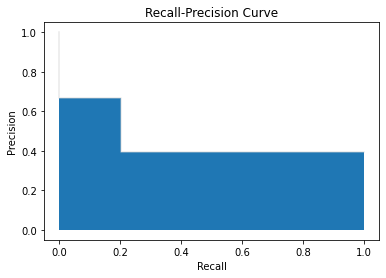

In [52]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_log)
plt.step(recall, precision, color = 'lightgray', alpha = .5, where = "post")
plt.fill_between(recall, precision, step="post")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve")

# Support Vector Machine

In [53]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

svm_score_train = round(svm.score(x_train, y_train)*100, 2) 
svm_score_test =  round(svm.score(x_test, y_test)*100, 2)

print("SVM train accuracy: " + str(svm_score_train))
print("SVM test accuracy: " + str(svm_score_test))

SVM train accuracy: 61.66
SVM test accuracy: 61.09


In [54]:
avg_precision_SVM = average_precision_score(y_test, y_pred_svm)
print("Average Precision Score for SVM: "+ str(avg_precision_SVM))

Average Precision Score for SVM: 0.40251307923033275


Text(0.5, 1.0, 'Precision-Recall Curve')

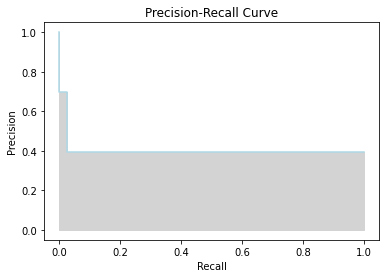

In [55]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_svm)
plt.step(recall, precision, color = 'lightblue', where = "post")
plt.fill_between(recall, precision, color = 'lightgray', step="post")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

# KNN

In [56]:
knn = KNeighborsClassifier(n_neighbors= int(np.sqrt(18361))) # sqrt(n), where n is number of data points
knn.fit(x_train, y_train)
y_pred_KNN = knn.predict(x_test)
knn_score_train = round(knn.score(x_train, y_train) * 100, 2)
knn_score_test = round(knn.score(x_test, y_test) * 100, 2)


print("KNN train accuracy: " + str(knn_score_train))
print("KNN test accuracy: " + str(knn_score_test))


KNN train accuracy: 76.21
KNN test accuracy: 74.76


In [57]:
avg_precision_KNN = average_precision_score(y_test, y_pred_KNN)
print("Avg Precision Score for KNN: " + str(avg_precision_KNN))

Avg Precision Score for KNN: 0.5875555075004927


Text(0.5, 0, 'Recall')

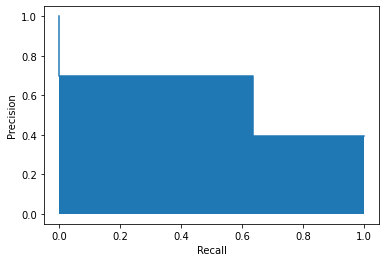

In [58]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_KNN)
plt.step(recall, precision, where="post")
plt.fill_between(recall, precision, step="post")
plt.ylabel("Precision")
plt.xlabel("Recall")

In [59]:
per = Perceptron(max_iter= 40, eta0 = 0.01, random_state=100)
per.fit(x_train, y_train)
y_pred_per = per.predict(x_test)

per_score_train = round(per.score(x_train, y_train)*100, 2)
per_score_test = round(per.score(x_test, y_test)*100, 2)

print("Perceptron train accuracy: " + str(per_score_train))
print("Perceptron test accuracy: " + str(per_score_test))

Perceptron train accuracy: 60.74
Perceptron test accuracy: 60.28
